In [1]:
# Part A

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

tol = 10e-6
L = 4 
xspan = np.arange(-L, L + 0.1, 0.1)
eps_start = 0.1

col = ['r', 'b', 'g', 'c', 'm', 'k'] # eigenfunc colors

eigenvalues = []
eigenfunctions = []

def RHS(y, x, En):
    return [y[1], (x**2 - En) * y[0]]

for modes in range(1, 6): # begin mode loop
    epsilon = eps_start # initial value of epsilon
    d_eps = 0.2 # default step size of epsilon
    
    for _ in range(1000): # begin convergence loop for epsilon
        Y0 = [1, np.sqrt(L**2 - epsilon)]
        # y = odeint(RHS, Y0, xspan, args=(epsilon,)) 
        y = solve_ivp(RHS, xspan, Y0, args=(epsilon,))
        
        if abs(y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) < tol: # check for convergence
            eigenvalues.append(epsilon)
            break # get out of convergence loop
            
        if ((-1) ** (modes + 1) * (y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0])) > 0:
            epsilon += d_eps
        else:
            epsilon -= d_eps
            d_eps = d_eps / 2
    eps_start = epsilon + 0.1 # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) # calculate the normalization
    func = abs(y[:, 0]/ np.sqrt(norm))
    
    eigenfunctions.append(func)
    
    plt.plot(xspan, func, col[modes - 1]) 

A2 = eigenvalues
print(A2)
A1 = eigenfunctions
print(A1)
A1 = np.array(A1).T
# A2 = 81 * 5 matrix





ValueError: too many values to unpack (expected 2)


Eigenvalues (A4):
[0.99937352 2.996839   4.99140656 6.98038865 8.95060003]
Eigenfunctions (A3):
[[1.66124151e-03 9.43803513e-03 3.69400332e-02 1.15014881e-01
  3.01172030e-01]
 [1.78830627e-03 1.00518601e-02 3.89290330e-02 1.19950616e-01
  3.10902340e-01]
 [2.16950056e-03 1.18933348e-02 4.48960324e-02 1.34757820e-01
  3.40093272e-01]
 [2.84228931e-03 1.50957831e-02 5.51050754e-02 1.59617434e-01
  3.87953283e-01]
 [3.87578239e-03 1.99124477e-02 7.01074849e-02 1.95186758e-01
  4.54199952e-01]
 [5.37284331e-03 2.67130215e-02 9.06964748e-02 2.42427491e-01
  5.38657314e-01]
 [7.47438277e-03 3.59853943e-02 1.17868753e-01 3.02443210e-01
  6.40887135e-01]
 [1.03652639e-02 4.83392542e-02 1.52783351e-01 3.76309653e-01
  7.59840266e-01]
 [1.42813345e-02 6.45086094e-02 1.96710017e-01 4.64888341e-01
  8.93529737e-01]
 [1.95170899e-02 8.53504270e-02 2.50961192e-01 5.68620582e-01
  1.03874038e+00]
 [2.64333891e-02 1.11836606e-01 3.16803244e-01 6.87305335e-01
  1.19080048e+00]
 [3.54645249e-02 1.4503

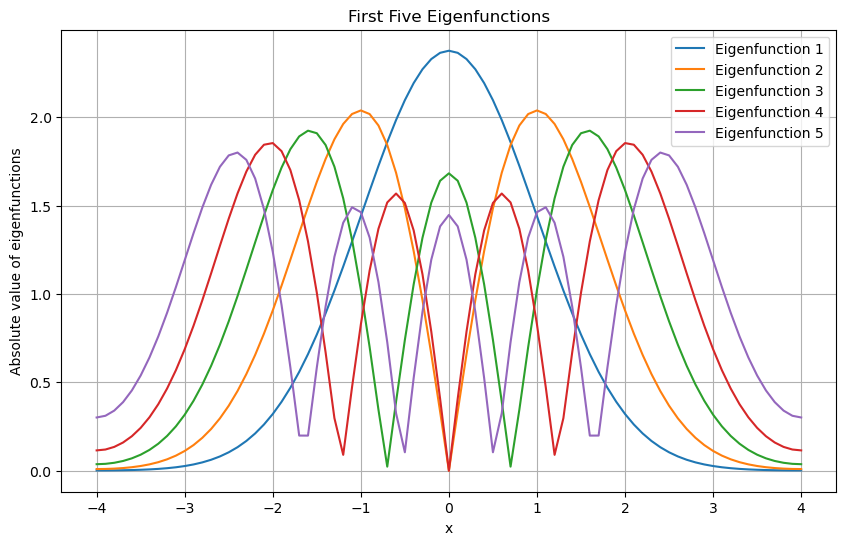

In [7]:
# Part B

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs

# Parameters
# tol = 10e-6
L = 4 
xspan = np.arange(-L, L + 0.1, 0.1)
eps_start = 0.1
N = len(xspan) - 2 # Used for the number of interior points
d_x = xspan[1] - xspan[0]

eigenvalues = []
eigenfunctions = []

# Initialize the matrix A (Second deriv)
A = np.zeros((N, N))

# Populate the matrix with finite difference coefficients
for i in range(N):
    A[i, i] = (-2 - d_x**2 * xspan[i+1]**2)
    # Upper diag
    # if i < N-3:
    if i < N-1:
        A[i, i+1] = 1
        A[i+1, i] = 1

# Boundary conditions
A[0, 0] += 4/3
A[0, 1] -= 1/3
A[N-1, N-1] += 4/3 
A[N-1, N-2] -= 1/3

# Solve for eigenvalues and eigenfunctions
eigenvalues, eigenfunctions = eigs(-A, k=5, which='SM')


# use forward difference to find hi_0 and phi_n
phi_0 = (4/3) * eigenfunctions[0, :] - (1/3) * eigenfunctions[1, :]
phi_N = (4/3) * eigenfunctions[-1, :] - (1/3) * eigenfunctions[-2, :]
eigenfunctions = np.vstack([phi_0, eigenfunctions, phi_N])


y_sol_b = np.zeros((N+2, 5))
E_sol_b = np.zeros(5)

for i in range(5):
    #calc norm
    norm = np.trapz(eigenfunctions[:, 0] * eigenfunctions[:, 0], xspan) # calculate the normalization
    y_sol_b[:,i] = abs(eigenfunctions[:, i]/ norm)

E_sol_b = eigenvalues[:5]/ (d_x**2)

# Store results
A3 = np.abs(y_sol_b)
A4 = np.real(E_sol_b)

# Display results
print("\nEigenvalues (A4):")
print(A4)
print("Eigenfunctions (A3):")
print(A3)

# Plotting the eigenfunctions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(xspan, A3[:, i], label=f'Eigenfunction {i+1}')
plt.title('First Five Eigenfunctions')
plt.xlabel('x')
plt.ylabel('Absolute value of eigenfunctions')
plt.legend()
plt.grid()
plt.show()

# A3 (81, 5)
# A4(5,)
# A? = 1, 3, 5, 7, 9
# this is wrong! 


In [9]:
# Part C
# Y vals = eigfunc
# E vals = eigval

# Parameters

#tol = 10e-6
L = 2 
xspan = np.arange(-L, L + 0.1, 0.1)
A = 10e-6
eps_start = 0.1
N = len(xspan)

E_sol_c_pos = np.zeros(2)
E_sol_c_neg = np.zeros(2)
y_sol_c_pos =  np.zeros((N, 2))
y_sol_c_neg = np.zeros((N, 2))

# eigenvalues = []
# eigenfunctions = []

def hw3_rhs_c (x, y, eps, gamma):
    return [y[1], (gamma*y[0]**2 + x**2 - eps)* y[0]]

for gamma in [0.05, -0.05]:
    eps_init = 0.1
    A = 1e-6
    for modes in range(100): #Modes loop
        dA = 0.01
        for jj in range(100): # Update A loop
            eps = eps_init
            d_eps = 0.2
            for j in range(100): # Update E loop
                y0 = [A, np.sqrt(L**2 - eps)*A]
                sol = solve_ivp(lambda xspan, y: hw3_rhs_c(xspan, y, eps, gamma), [xspan[0], xspan[-1]], y0, t_eval = xspan)
                yS = sol.y.T
                xS = sol.t
    
                bc = yS[-1, 1] + np.sqrt(L**2 - eps) * yS[-1, 0]
                if abs(bc) < tol:
                    break
                if (-1)**modes*bc > 0:
                    eps += d_eps
                else:
                    eps -= d_eps
                    d_eps /= 2
            area = np.trapz(yS[:,0]**2, x=xS)
            if abs(area - 1) < tol:
                break
            if area < 1:
                A += dA
            else:
                A -= dA / 2
                dA / 2
        eps_init = eps + 0.2
        if gamma > 0:
            #Save pos value abs(e -vecs)
            E_sol_c_pos[modes - 1] = eps
            y_sol_c_pos[:, modes -1] = np.abs(yS[:, 0])
        if gamma < 0:
            # Save neg val abs(e vvece)
            E_sol_c_neg[modes - 1] = eps
            y_sol_c_neg[:, modes -1] = np.abs(yS[:, 0])
            
# A5 pos Y func
# A6 pos E val
# A7 neg Y func
# A8 neg E val
A5 = y_sol_c_pos
A6 = E_sol_c_pos
A7 = y_sol_c_neg
A8 = E_sol_c_neg

print(A5)


C:\Users\User\AppData\Local\Temp\ipykernel_3976\642177596.py:34: RuntimeWarning: invalid value encountered in sqrt
  y0 = [A, np.sqrt(L**2 - eps)*A]


ValueError: All components of the initial state `y0` must be finite.

In [11]:
# Part D

def hw3_rhs_d(x, y, E):
    return [y[1], (x**2 - E) * y[0]]
L = 2
xspan = [-L, L]
E = 1
A = 1
y0 = [A, np.sqrt(L**2 - E)*A]
tols = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
dt45 = []
dt23 = []
dtRadau = []
dtBDF = []

for tol in tols:
    options = {'rtol':tol, 'atol':tol}
    sol_45 = solve_ivp(hw3_rhs_d, xspan, y0, method='RK45', args=(E,), **options)
    sol_23 = solve_ivp(hw3_rhs_d, xspan, y0, method='RK23', args=(E,), **options)
    sol_Radau = solve_ivp(hw3_rhs_d, xspan, y0, method='Radau', args=(E,), **options)
    sol_BDF = solve_ivp(hw3_rhs_d, xspan, y0, method='BDF', args=(E,), **options)

    #calc average time steps
    #for each method, add mean(diff(sol.t))
    # np.mean(np.diff)
    dt45 += sol_45.t
    dt23 += sol_23.t
    dtRadau += sol_Radau.t
    dtBDF += sol_BDF.t

# Perform linear regression to determine slopes
fit45 = np.polyfit(np.log(dt45), np.log(tols), 1)
fit23 = np.polyfit(np.log(dt23), np.log(tols), 1)
fitRadau = np.polyfit(np.log(dtRadau), np.log(tols), 1)
fitBDF = np.polyfit(np.log(dtBDF), np.log(tols), 1)

# Extract slopes
A9 = [fit45[0], fit23[0], fitRadau[0], fitBDF[0]]

ValueError: operands could not be broadcast together with shapes (0,) (10,) 

In [19]:
# Part E

import math

def h(x):
    return np.array([np.ones_like(x), 2*x, 4*x**2 -2, 8*x**3 - 12*x, 16*x**4 - 48*x**2 + 12])

phi = np.zeros((N, 5))
for j in range(5):
    phi[:,j] = [math.e**((-xspan**2)/2)*(h[j,:]) / np.sqrt(math.factorial(j) * 2**j * np.sqrt(math.pi))].T

erpsi_a = np.zeros(5)
erpsi_b = np.zeros(5)
er_a = np.zeros(5)
er_b = np.zeros(5)

for j in range(5):
    erpsi_a[j] = simps((abs(y_sol_a[:,j]) - abs(phi[:,j]))**2, x)
    erpsi_b[j] = simps((abs(y_sol_b[:,j]) - abs(phi[:,j]))**2, x)
    er_a[j] = 100*abs(E_sol_a[j] - (2*j - 1)) / (2*j - 1)
    er_b[j] = 100*abs(E_sol_b[j] - (2*j - 1)) / (2*j - 1)

A10 = erpsi_a
A11 = er_a
A12 = erpsi_b
A13 = er_b


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'